### t tests compare means of contibuous alues betweeen groups

In [20]:
from pydataset import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [21]:
df = data("tips")
df

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


# Types of T-Tests

## Samples:

### One Sample
- One Sample t-test compares the mean of a subgroup to the main of a population
- One sample example is Sunday tips vs. the rest of the week tips

### Two Sample
- The two sample t-test compares the means of two subgroups
- A two-sample t-test would be comparing average tips between smokers vs. nonsmokers

## Tails:

### Two Tailed Checks for Any Difference between the means
- a two tailed t test is measuing fo r any difference, rgardless of direction (means of one group higher or lower)
- the two tailed t test is checking if the means of two groups are different
- if we have two tailed t test we can us ethe p calue as is the compare it to the alpha
- means are differnect (either one is higher or lower, but two tailed means wee're not fiocused on direction)

### One tailed chcks if one means is greater han or less than the other
- to test if the mean sare higher, we evaluate `(p/2) < a and t > 0` (to test if higher)
- for checking if less than we do ` (p/2) < a and t < 0`
- for greater than or less than


## So do you use one tailed or two tailed?
- it depends on how youre formeing you alt hypothesis
- if your alt hypothesis states " these is a difference between these groups" - two tailed
- if alt hypothesis states "X group has haigher/lowe tips than Y" - one tails
- for finding if there is a difference

In [22]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
# Do smokershave a larger total_bill than non smokers
# null hypothesis is that the total_bills are the same for both group;s
# We;re comparing 2 subgroups, so we will be doing 2 sample t test
# Since we're looking if one group is higher total_bill.mean than the other, one tailed

In [24]:
null_hypothesis = "No means of total_bills are the same for smoker vs. nonsmoker"
alternative_hypothesis = "Smokers have a high total_biol than nonsmokers"
confidence_level = .95
a = 1 - confidence_level #call your shot before you run your test

In [25]:
# Lets compare the two populations visually
smokers = df[df.smoker == "Yes"]
non = df[df.smoker == "No"]

In [44]:
smokers

,total_bill,tip,sex,smoker,day,time,size
57,38.01,3.00,Male,Yes,Sat,Dinner,4
59,11.24,1.76,Male,Yes,Sat,Dinner,2
61,20.29,3.21,Male,Yes,Sat,Dinner,2
62,13.81,2.00,Male,Yes,Sat,Dinner,2
63,11.02,1.98,Male,Yes,Sat,Dinner,2
64,18.29,3.76,Male,Yes,Sat,Dinner,4
68,3.07,1.00,Female,Yes,Sat,Dinner,1
70,15.01,2.09,Male,Yes,Sat,Dinner,2
73,26.86,3.14,Female,Yes,Sat,Dinner,2
74,25.28,5.00,Female,Yes,Sat,Dinner,2


<AxesSubplot:>

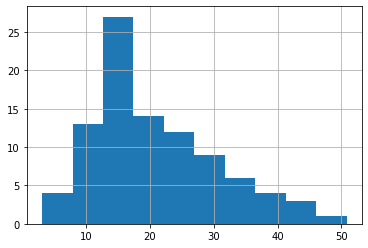

In [26]:
smokers.total_bill.hist()

<AxesSubplot:>

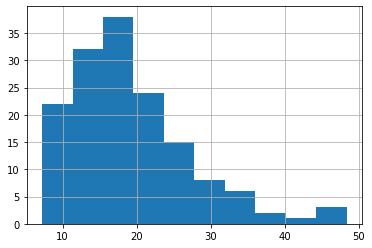

In [27]:
non.total_bill.hist()

In [28]:
# two sample b/c we are coparing two subgroups to eachother
# Single tail, because we are cheicking if smokers total_bill is higher
# .ttest_ind test of independence == 2 sample t test function

t, p = stats.ttest_ind(smokers.total_bill, non.total_bill)
t, p

(1.3384363834700073, 0.1820103288430244)

In [29]:
#p/2 along with t > 0 is how we compare means if higher
if (p/2) < a and t > 0: 
    print("Reject the hull hypothesis")
else:
    print("We fail to reject the null hypothesis")
        #in enlgish this mean that there is not sufficient evidence that smokers have a higher bil than non smokers

We fail to reject the null hypothesis


In [30]:
# lets take this setup from above and check if the means are differnet, regardless
null_hypothesis = "This mean total_bill of nonsmokers is the same"
alternative_hypothesis = " The mean total_bill of nonsmokers and smokers are different"
#Still 2 sme because there are 2 subgroups, and two tailed because were looking for any 

In [31]:
t, p = stats.ttest_ind(smokers.total_bill, non.total_bill)

if p < a: 
    print("Reject the hull hypothesis, they are the same")
    print("We move forward wiht the alternative hypothesis")
else:
    print("We fail to reject the null hypothesis")
        # in english we dont have sufficent evidence to support the claim that smokers aqnd non smokers have different bills

We fail to reject the null hypothesis


## the waitress notices us working on stats in the boot all the time
they ask us:
- "given this data, are tips different on weekends vs. weekdays?
- we'll have to make
a weekend group and a weekday group (todo)
- we're comparing two subgorups, we have a 2 sample test
- if we're not concerned about direction but only if the means are different then we'll go wiht 2 tails

In [32]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
def weekend(x):
    if x == "Sun" or x == "Sat":
        return 1
    else:
        return 0

In [34]:
df["is_weekend"] = df.day.apply(weekend)
df.tail()
#Creates a new column using the weekend function to determine if the tip was given on the weekend or weekday

,total_bill,tip,sex,smoker,day,time,size,is_weekend
240,29.03,5.92,Male,No,Sat,Dinner,3,1
241,27.18,2.00,Female,Yes,Sat,Dinner,2,1
242,22.67,2.00,Male,Yes,Sat,Dinner,2,1
243,17.82,1.75,Male,No,Sat,Dinner,2,1
244,18.78,3.00,Female,No,Thur,Dinner,2,0


In [35]:
weekend = df[df.is_weekend == 1]
weekdays = df[df.is_weekend == 0]

<AxesSubplot:>

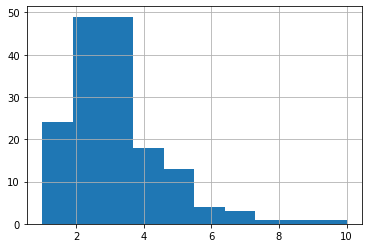

In [36]:
weekend.tip.hist()

<AxesSubplot:>

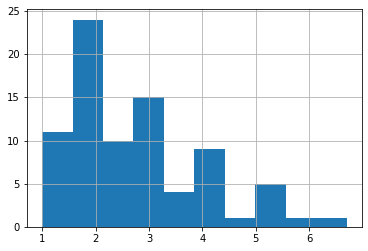

In [37]:
weekdays.tip.hist()

In [38]:
t, p = stats.ttest_ind(weedays.tip, weekends.tip)
t, p

NameError: name 'weedays' is not defined

In [39]:
if p < a:
    print(" We reject tthe null hypothesis that weekend and weekday tips are the same")
else:
    print("We fail to reject the null hypohtesis")
    print("Not enough evidence to support the claim that thetip levels are different")

We fail to reject the null hypohtesis
Not enough evidence to support the claim that thetip levels are different


## So we dont have evidence to cupport the claim that the means are significantly different

In [40]:
# Lets check if the weekday tips are higher than the weekend tips!
# this means we are going from a two tailedd ( direction amivilent) to a one tailed test
confidence_level = .95
a = 1 - confidence_level

#PAY CLOSE ATTNTION
# the direction of a ne tailed test here, an the t < 0 or t >0 part
# comes down to the first arg into .ttest_ind

t, p = stats.ttest_ind(weekdays.tip, weekend.tip)
t, p

(-1.8834950801996837, 0.06083244523772748)

In [41]:
#Lets make a new hypothesis

null_hypothesis = "There is no diffenece"
alternative_hypothesis = "weekday tips are greater than weekend tips" #paying attentioontot eh order of args

In [42]:
# lets check the one tailed test
# t > 0 if we aretesting if one mean is higher than the other
if (p/2) < a and t > 0:
    print("We reject the null hypothesis")
    print("we movee forward with the understanding that weekday tups are lower than weekend tips")
else:
    print("we fail to reject the null hypothesis")
    print("we dont have sufficent evidence to support the claim that", alternative_hypothesis)

we fail to reject the null hypothesis
we dont have sufficent evidence to support the claim that weekday tips are greater than weekend tips


In [43]:
weekdays.tip.mean(), weekend.tip.mean()

(2.7628395061728392, 3.1152760736196328)

# compare means

A T-test lets us compare a categorical and a continuous variable by comparing the mean of the continuous variable by subgroups based on the categorical variable.

A t-test can help us answer questions like:

- Are the salaries of the marketing department higher than the company average?
- Do customers that receive marketing emails spend more money?
- Are sales for product A higher when we run a promotion for it?

In this lesson we will explore the one sample t-test, which lets us compare a subgroup against the population, and the two sample t-test, which allows us to compare subgroups.

For this lesson we will look at a dataset that contains student's scores on an exam:

# One Sample T-Test
The one sample t-test lets us compare the mean for a specific subgroup against the population mean.

The t-statistic is given by:

                    t=¯x−μs/√n

The null hypothesis is that there is no difference in the means. For our example, we'll compare the exam scores of left-handed people against the entire population.

- H0: there is no difference between left-handers exam scores and the overall average.
- H1: there is a difference between left-handers exam scores and the overall average.

One of the assumptions of the t-test is that the continuous variable is normally distributed. To check this, we can make a quick visualization:

## Two Sample T-Test
We can also use a t-test to compare the means between two different supgroups. The calculation of the test statistic for this test is:

t=¯x1−¯x2sp√1n1+1n2
Where sp is the pooled standard deviation, and is given by:

sp=√(n1−1)s21+(n2−1)s22n1+n2−2

First we'll setup our hypothesis:

- H0: There is no difference in the exam scores for those who studied with flashcards and those who didn't.
- H1: There is a difference in the exam scores for those who studied with flashcards and those who didn't.

And then write the code to calculate our test statistic.

